In [884]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [900]:
n_task_per_file = 20
n_files = 10
base_dir = "noise_sd=1/vary_r_nomarg_noisesd_1.0_n_200_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [901]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [902]:
coverage_df

,0.1,0.2,0.3,full,UV(0.1)
0,1.000000,1.000000,1.000000,0.666667,1.00
1,1.000000,0.833333,1.000000,0.833333,1.00
2,0.666667,1.000000,0.833333,0.833333,0.75
3,1.000000,1.000000,0.833333,0.833333,1.00
4,0.800000,1.000000,1.000000,1.000000,0.75
...,...,...,...,...,...
2,1.000000,0.833333,1.000000,0.833333,1.00
3,0.714286,1.000000,0.666667,0.333333,0.75
4,1.000000,1.000000,0.666667,0.833333,1.00
5,1.000000,0.666667,1.000000,0.571429,1.00


In [903]:
length_df

,0.1,0.2,0.3,full,UV(0.1)
0,14.475704,12.873208,16.779565,6.594353,21.821449
1,20.284384,13.038563,13.066691,6.845654,21.821449
2,13.979312,14.027739,16.061881,6.671094,21.821449
3,12.927514,11.039324,12.667086,6.891464,21.821449
4,13.858774,10.693594,12.079912,6.532519,21.821449
...,...,...,...,...,...
2,16.028644,10.897511,12.560600,7.197082,21.821449
3,11.117970,12.670098,11.826838,6.168479,21.821449
4,14.832313,17.424066,15.225120,6.668132,21.821449
5,13.705770,12.649656,11.927914,6.778128,21.821449


In [904]:
MSE_df

,0.1,0.2,0.3,full,UV(0.1)
0,5.099341,4.470659,4.749366,4.749366,4.932808
1,4.594842,4.454604,4.272533,4.272533,4.716333
2,4.720261,4.637741,4.602204,4.602204,4.943102
3,5.251753,5.052439,4.917542,4.917542,5.674567
4,3.949075,4.111491,4.008867,4.008867,3.856718
...,...,...,...,...,...
2,4.686040,4.679416,4.769431,4.769431,4.750447
3,5.831745,6.013713,5.897492,5.897492,6.796999
4,4.651202,4.977776,5.383395,5.383395,5.301955
5,4.026455,3.981731,3.895591,3.895591,4.174822


In [905]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i], showmeans=True)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        """for j, mean in enumerate(means):
            print(j, mean)
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean"""
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,50)
        elif metric == "MSE":
            axes[i].set_ylim(0,10)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 0.1        0.918012
0.2        0.858247
0.3        0.866322
full       0.797239
UV(0.1)    0.913043
dtype: float64
Length :
 0.1        14.625180
0.2        13.162847
0.3        13.204886
full        6.698310
UV(0.1)    21.821449
dtype: float64
MSE :
 0.1        4.737993
0.2        4.709785
0.3        4.736649
full       4.736649
UV(0.1)    4.852301
dtype: float64


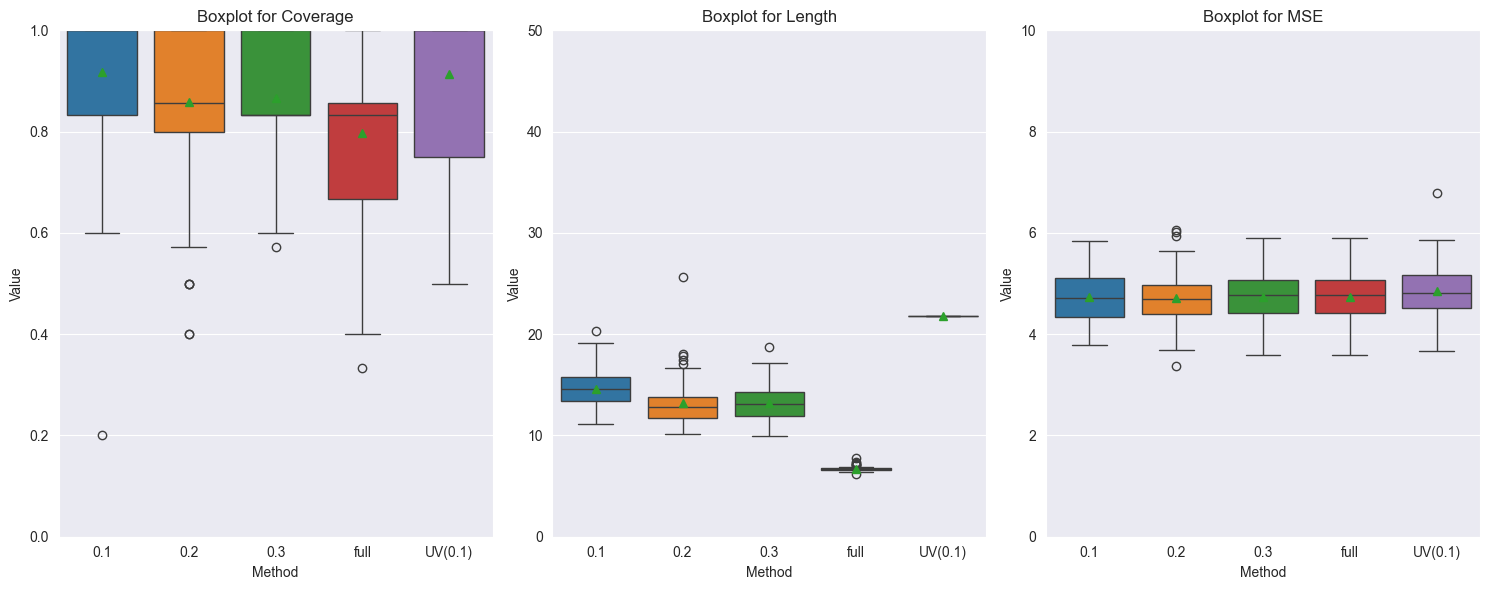

In [906]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

Coverage :
 0.1        0.882143
0.2        0.775595
0.3        0.645714
0.4        0.627381
0.5        0.583571
0.6        0.561667
0.7        0.551369
0.8        0.513155
full       0.830119
UV(0.1)    0.906250
dtype: float64
Length :
 0.1        40.478966
0.2        26.498739
0.3        22.802259
0.4        20.992620
0.5        18.630494
0.6        16.885335
0.7        15.342226
0.8        13.685779
full        6.687487
UV(0.1)    21.821449
dtype: float64
MSE :
 0.1        4.614567
0.2        4.646398
0.3        4.650816
0.4        4.604210
0.5        4.636576
0.6        4.658551
0.7        4.658513
0.8        4.681474
full       4.681474
UV(0.1)    4.792256
dtype: float64


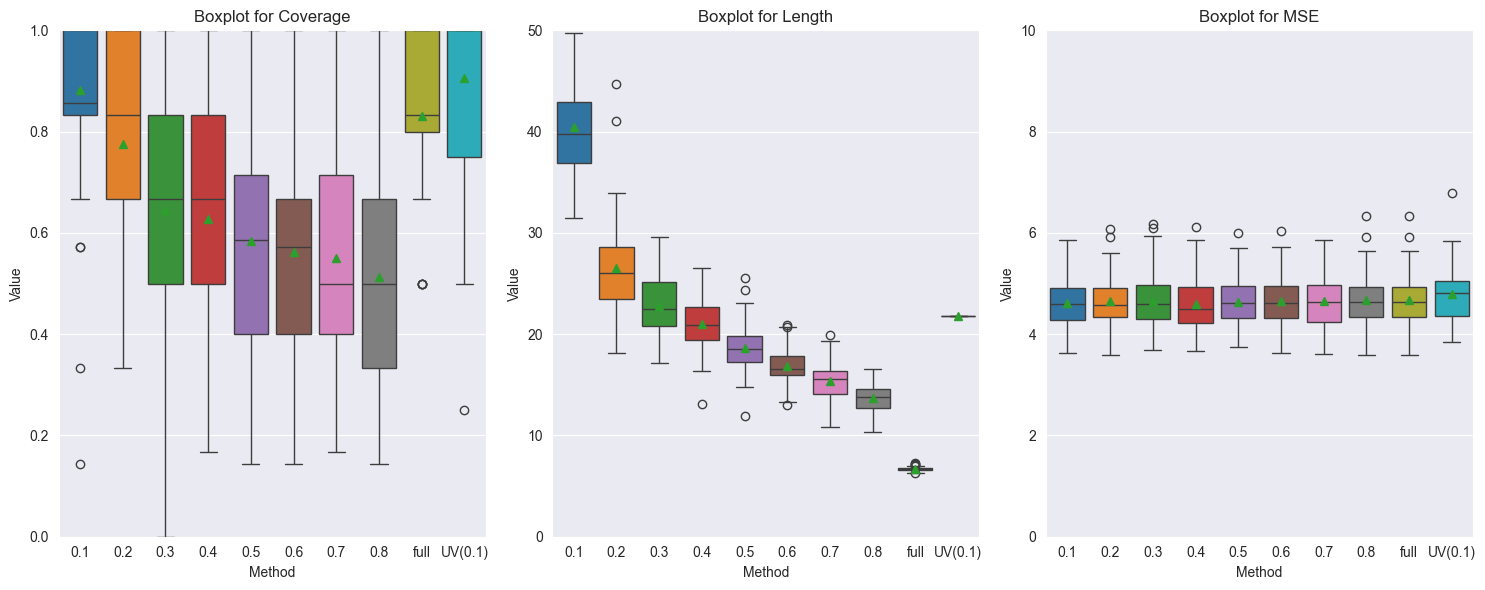

In [737]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

In [682]:
coverage_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,full,UV(0.1)
0,0.857143,0.833333,1.000000,0.833333,1.000000,0.833333,1.000000,0.833333,0.666667,0.75
1,1.000000,1.000000,1.000000,1.000000,1.000000,0.166667,1.000000,0.571429,0.857143,1.00
2,1.000000,0.666667,1.000000,0.571429,0.714286,0.833333,0.833333,0.666667,0.833333,1.00
3,1.000000,1.000000,1.000000,0.571429,1.000000,0.571429,1.000000,0.833333,0.833333,0.75
4,0.800000,1.000000,0.200000,0.600000,1.000000,0.166667,1.000000,1.000000,0.800000,1.00
...,...,...,...,...,...,...,...,...,...,...
21,1.000000,0.800000,1.000000,1.000000,1.000000,0.833333,1.000000,0.833333,0.833333,0.50
22,1.000000,0.833333,1.000000,0.833333,1.000000,1.000000,0.666667,0.166667,0.333333,0.50
23,1.000000,0.833333,1.000000,0.833333,0.500000,1.000000,0.833333,1.000000,1.000000,0.50
24,0.666667,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00


In [397]:
a = np.random.multivariate_normal(mean=np.zeros(3), cov=np.eye(3), size=10)

In [403]:
a

array([[ 1.06793651,  1.36987016,  0.38254673],
       [-0.00676015,  0.04964653,  0.54545289],
       [ 0.36283111,  1.14141412, -0.09072415],
       [-0.35752269,  0.12027834,  1.73155615],
       [-0.2604219 , -0.41158687,  0.85320342],
       [-0.06342349,  0.26980504,  0.54805346],
       [ 3.11418919, -0.40739602,  0.14077256],
       [-1.10491165,  0.58322557, -0.02100113],
       [ 1.94883554,  0.87846771, -0.46144371],
       [-1.41438826,  0.90600893,  1.3235796 ]])

In [406]:
a.max(axis=1) < 1

array([False,  True, False, False,  True,  True, False,  True, False,
       False])

In [410]:
a.min(axis=1) > -1

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False])

In [413]:
np.logical_and(a.min(axis=1) > -1, a.max(axis=1) < 1).sum()

np.int64(3)